<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/Spring_2022_Module_6_A_Streamlined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#### Code Block 1
# Data loading code block
ethnicity <- read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/rae.csv"))

tom_sums <-0   #tom stands for two or more ethnicities. 
years=seq(2013, 2019, 1)
for(year in 1:7) {
  temp_data = 0
  temp_data = subset(ethnicity, ID.Race==6 & Year==years[year])
  tom_sums[year]=sum(temp_data$Population)
}

tom <- data.frame(Year=years, Population=tom_sums)

str(tom)

'data.frame':	7 obs. of  2 variables:
 $ Year      : num  2013 2014 2015 2016 2017 ...
 $ Population: num  2407 2234 2030 1554 1320 ...


Sample size: 7 observational units.
Original sample statistic is an average of 1666.714 units with a standard deviation of 558.8553 units.
With a confidence level of 95%, the actual population paramater is between 1283.662 and 2050.802.


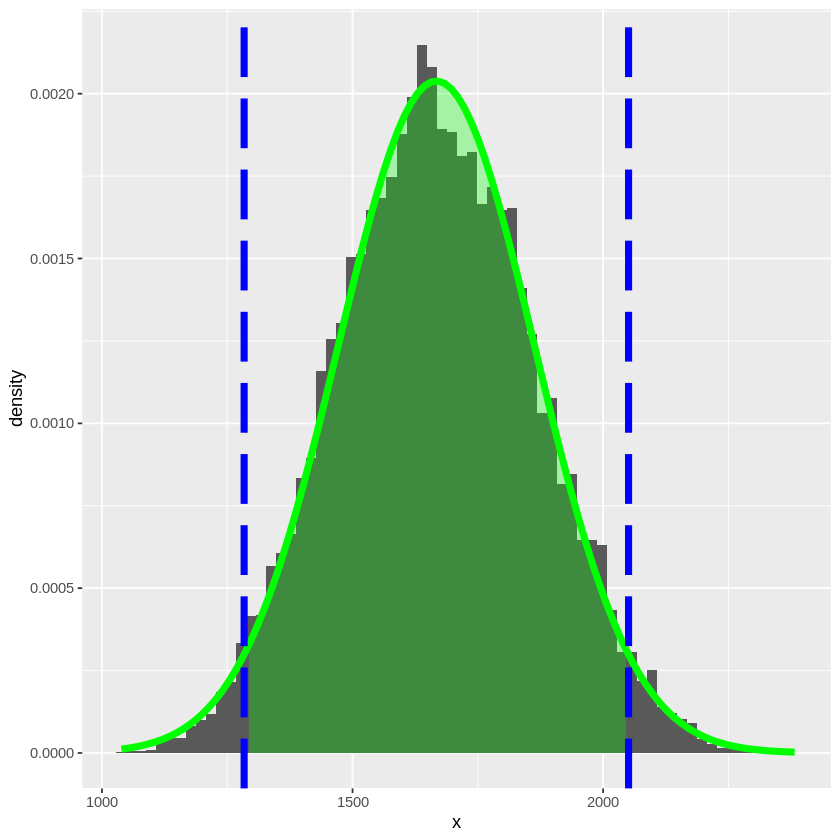

In [2]:
#### Code Block 2
# Confidence Interval code block
data<-0

data = tom$Population
z_conf=0.95 

## This part is automated.
alpha = 1-z_conf 
zsc=qnorm(z_conf + alpha/2)
size=length(data)
cat("Sample size:", size, "observational units.\n")
test <- 0
test_runs = 100000
for(i in 1:test_runs){
  test[i] = mean( sample(data,size,replace=TRUE))
  }
cat("Original sample statistic is an average of", mean(data),"units with a standard deviation of", sd(data), "units.\n")
Boot = data.frame(x=test)
Boot_mean = mean(Boot$x)
Boot_sd = sd(Boot$x)
Boot_left=Boot_mean - zsc*Boot_sd
Boot_right=Boot_mean + zsc*Boot_sd 
Boots=c(Boot_left,Boot_right)

library(ggplot2)

# Fancy function defined to allow for shading. 
dnorm_sd <- function(x,numsd){
  norm_sd <- dnorm(x,Boot_mean, Boot_sd)
  lb = Boot_mean - numsd*Boot_sd  #left bound 
  rb = Boot_mean + numsd*Boot_sd  #right bound 
  # Force NA values outside interval x in [leftbound, rightbound]:
  norm_sd[x <= lb | x >= rb] <- NA
  return(norm_sd)   #return is the result of the function dnorm_sd 
}

width = (max(data)-min(data))/(10*length(data))

ggplot( Boot, aes(x)) + 
  geom_histogram(aes(y=..density..),binwidth=width) +   #change bindwidth to be nice.
  stat_function( fun=dnorm,    args=list(mean=Boot_mean, sd=Boot_sd), col="green", size=2) +
  stat_function( fun=dnorm_sd, args=list(numsd=zsc),  geom="area",  fill="green", alpha=0.3 ) + 
  geom_vline( xintercept=Boots,  linetype="longdash",  col="blue", size=2) 

cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual population paramater is between ", Boot_left, " and ", Boot_right, ".\n")